In [4]:
import pandas as pd
df = pd.read_csv("depremler.csv", parse_dates=["tarih"])
df.head()

,tarih,latitude,longitude,mag,depth,sehir
0,2000-01-06,39.297874,26.987454,4.5,86.6,Malatya
1,2000-01-11,39.516751,27.464107,2.8,67.6,Denizli
2,2000-01-18,41.912745,41.158459,4.3,35.0,Van
3,2000-01-22,41.351770,43.708534,1.9,62.3,Sakarya
4,2000-01-26,41.870928,41.668938,4.4,4.1,Denizli


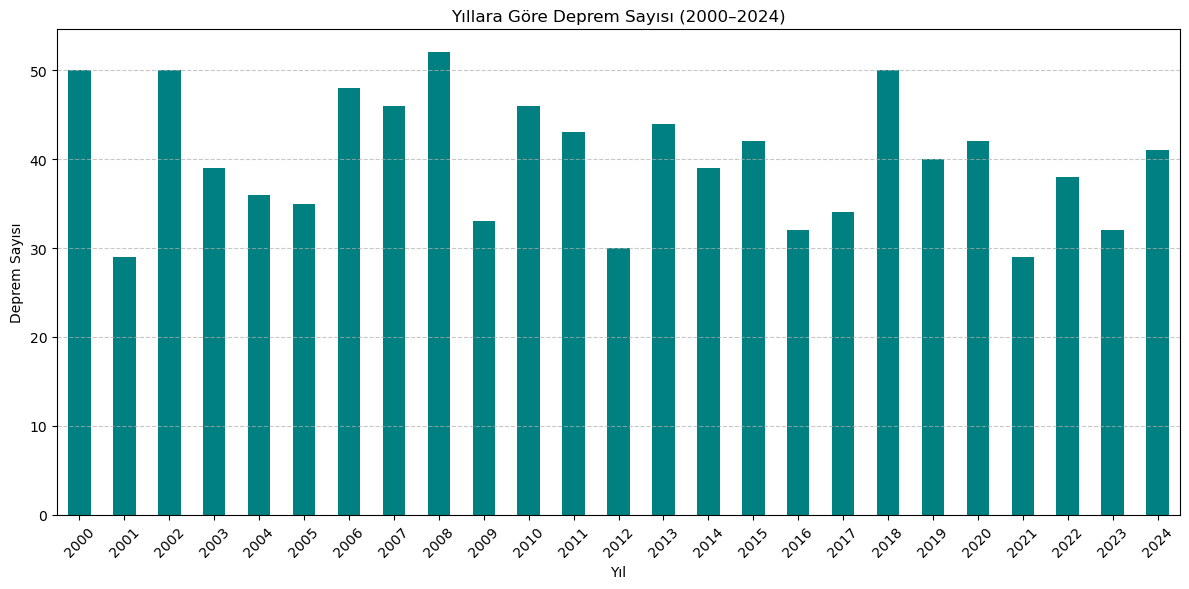

In [9]:
import matplotlib.pyplot as plt
df["yil"] = df["tarih"].dt.year
deprem_sayilari = df.groupby("yil").size()
plt.figure(figsize=(12, 6))
deprem_sayilari.plot(kind="bar", color="teal")
plt.title("Yıllara Göre Deprem Sayısı (2000–2024)")
plt.xlabel("Yıl")
plt.ylabel("Deprem Sayısı")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

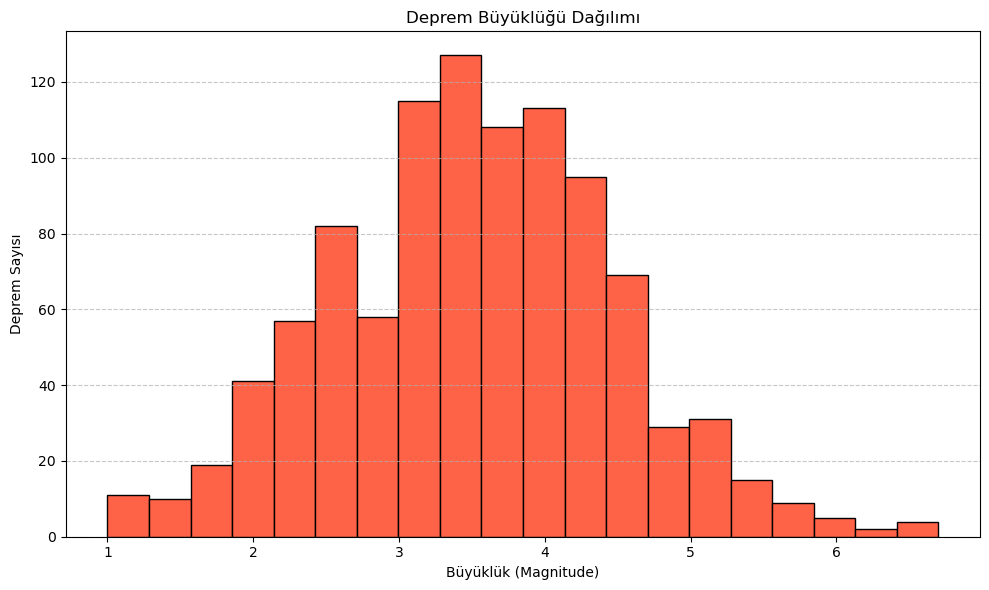

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df["mag"], bins=20, color="tomato", edgecolor="black")
plt.title("Deprem Büyüklüğü Dağılımı")
plt.xlabel("Büyüklük (Magnitude)")
plt.ylabel("Deprem Sayısı")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

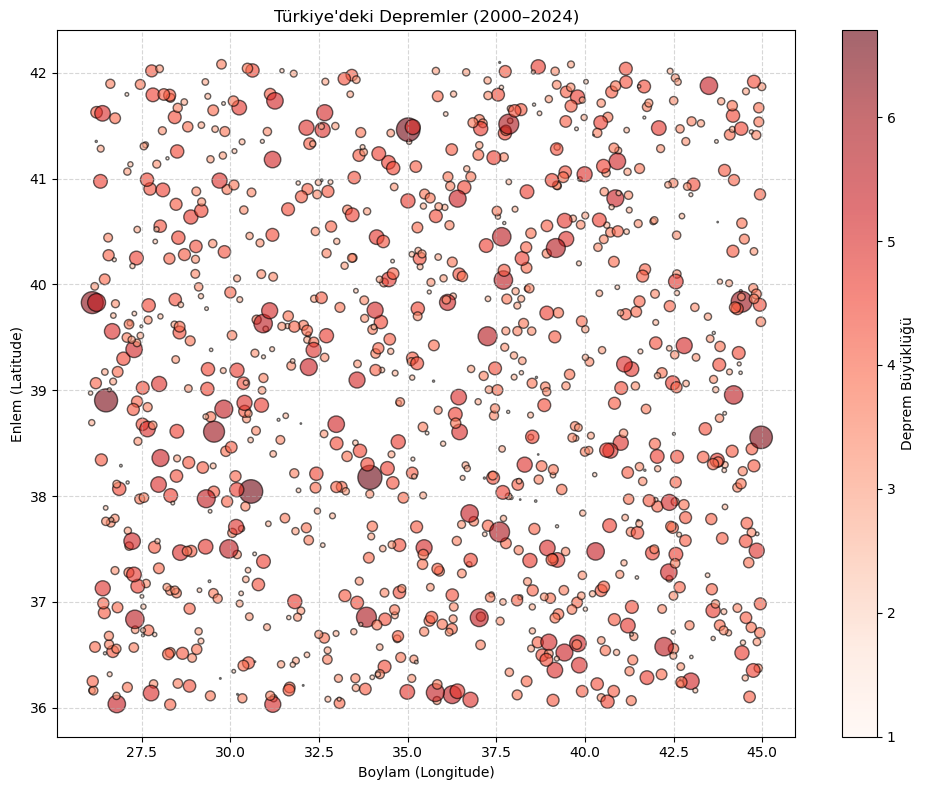

In [11]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(df["longitude"], df["latitude"], 
                 c=df["mag"], s=df["mag"]**3, 
                 cmap="Reds", alpha=0.6, edgecolors="k")

plt.colorbar(sc, label="Deprem Büyüklüğü")
plt.title("Türkiye'deki Depremler (2000–2024)")
plt.xlabel("Boylam (Longitude)")
plt.ylabel("Enlem (Latitude)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

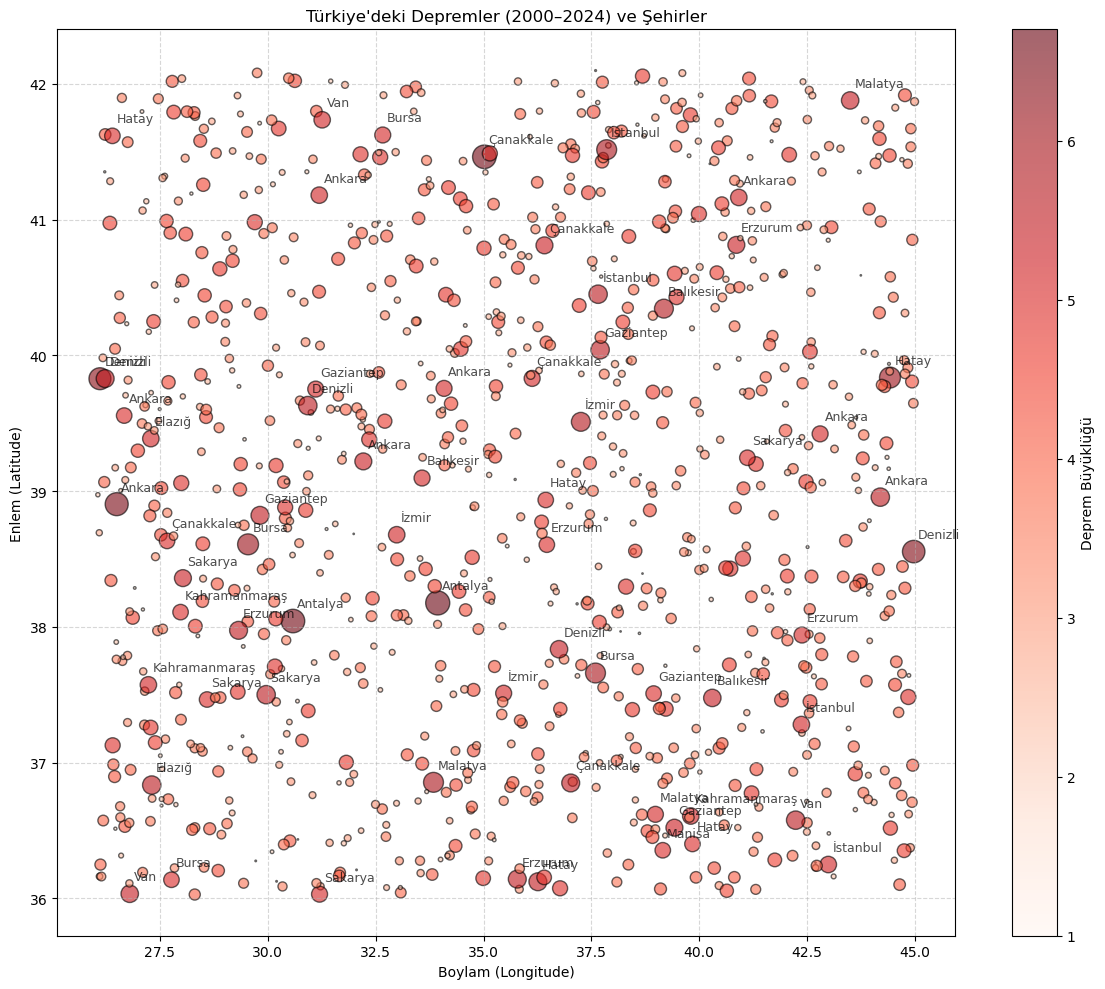

In [12]:
plt.figure(figsize=(12, 10))
sc = plt.scatter(df["longitude"], df["latitude"], 
                 c=df["mag"], s=df["mag"]**3, 
                 cmap="Reds", alpha=0.6, edgecolors="k")

plt.colorbar(sc, label="Deprem Büyüklüğü")
plt.title("Türkiye'deki Depremler (2000–2024) ve Şehirler")
plt.xlabel("Boylam (Longitude)")
plt.ylabel("Enlem (Latitude)")
plt.grid(True, linestyle="--", alpha=0.5)

# (örneğin, büyüklüğü 5+ olanlar)
df_labels = df[df["mag"] >= 5]

for _, row in df_labels.iterrows():
    plt.text(row["longitude"]+0.1, row["latitude"]+0.1, row["sehir"], fontsize=9, alpha=0.7)

plt.tight_layout()
plt.show()

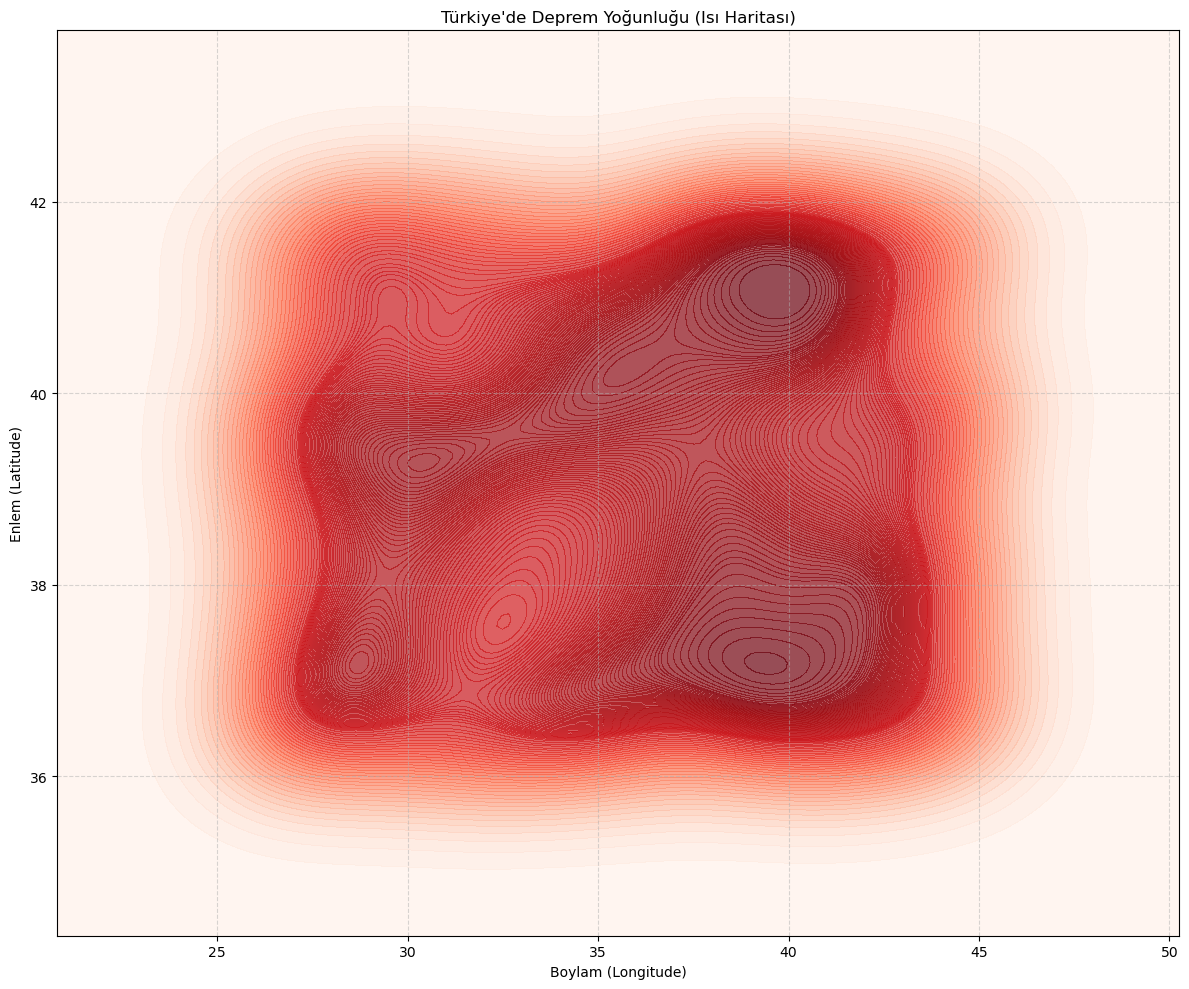

In [14]:
import seaborn as sns
plt.figure(figsize=(12, 10))

sns.kdeplot(
    x=df["longitude"],
    y=df["latitude"],
    fill=True,
    cmap="Reds",
    thresh=0,
    levels=100,
    alpha=0.7
)

plt.title("Türkiye'de Deprem Yoğunluğu (Isı Haritası)")
plt.xlabel("Boylam (Longitude)")
plt.ylabel("Enlem (Latitude)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


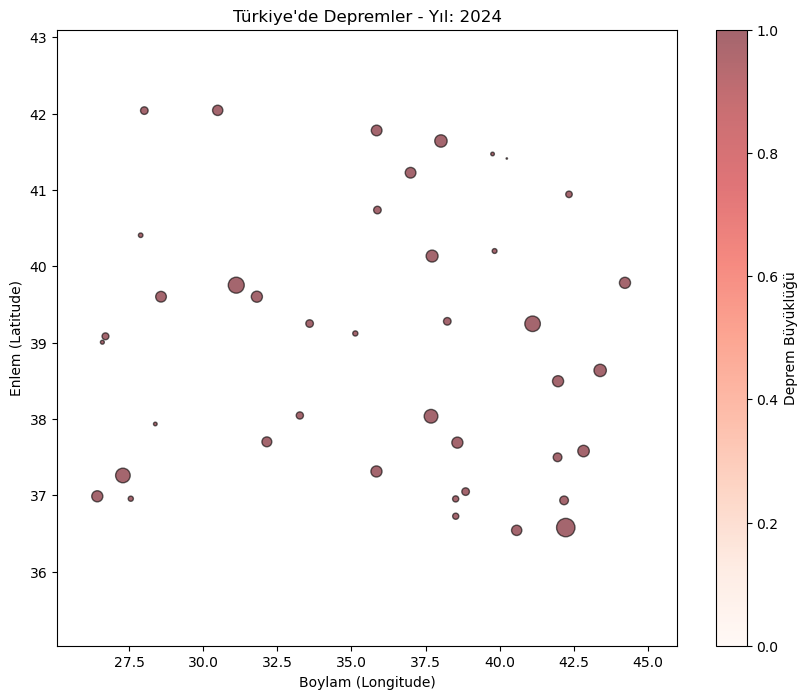

In [15]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Yıllara göre veri gruplama
years = sorted(df['yil'].unique())
df_grouped = [df[df['yil'] == year] for year in years]

fig, ax = plt.subplots(figsize=(10, 8))

sc = ax.scatter([], [], c=[], cmap='Reds', s=[], alpha=0.6, edgecolors='k')
cbar = plt.colorbar(sc, label="Deprem Büyüklüğü")
ax.set_xlim(df['longitude'].min() - 1, df['longitude'].max() + 1)
ax.set_ylim(df['latitude'].min() - 1, df['latitude'].max() + 1)
ax.set_xlabel("Boylam (Longitude)")
ax.set_ylabel("Enlem (Latitude)")
ax.set_title("Türkiye'de Yıllara Göre Depremler (Animasyon)")

def update(frame):
    year = years[frame]
    data = df_grouped[frame]
    sc.set_offsets(data[['longitude', 'latitude']])
    sc.set_array(data['mag'])
    sc.set_sizes(data['mag']**3)
    ax.set_title(f"Türkiye'de Depremler - Yıl: {year}")
    return sc,

ani = FuncAnimation(fig, update, frames=len(years), interval=800, blit=True)

HTML(ani.to_jshtml())

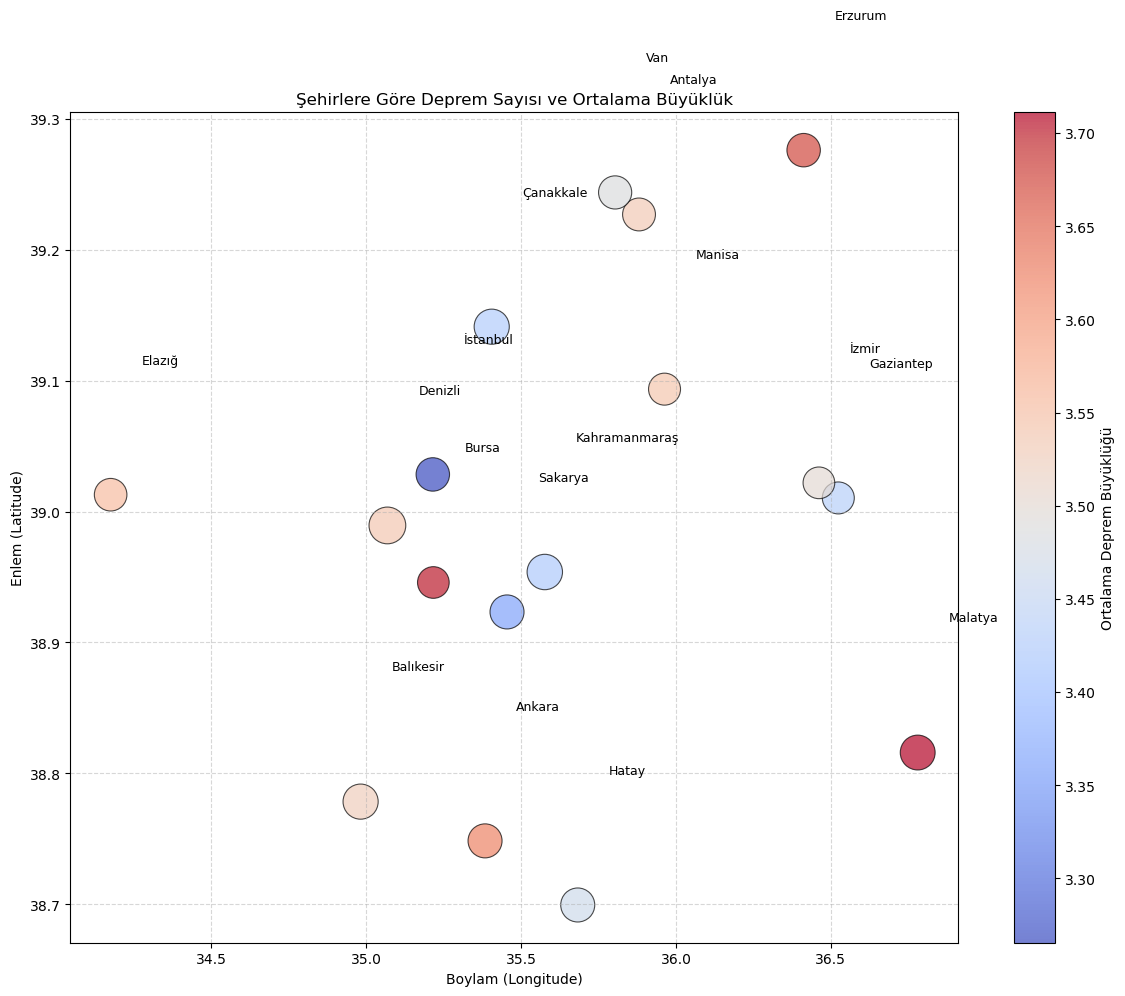

In [16]:
# Şehir bazında toplama
sehir_stats = df.groupby("sehir").agg(
    toplam_deprem_sayisi = ("mag", "count"),
    ortalama_buyukluk = ("mag", "mean"),
    ortalama_enlem = ("latitude", "mean"),
    ortalama_boylam = ("longitude", "mean")
).reset_index()

plt.figure(figsize=(12, 10))
sc = plt.scatter(
    sehir_stats["ortalama_boylam"],
    sehir_stats["ortalama_enlem"],
    s=sehir_stats["toplam_deprem_sayisi"]*10,  # Balon büyüklüğü
    c=sehir_stats["ortalama_buyukluk"],
    cmap="coolwarm",
    alpha=0.7,
    edgecolors="k",
    linewidth=0.8
)

plt.colorbar(sc, label="Ortalama Deprem Büyüklüğü")
plt.title("Şehirlere Göre Deprem Sayısı ve Ortalama Büyüklük")
plt.xlabel("Boylam (Longitude)")
plt.ylabel("Enlem (Latitude)")
plt.grid(True, linestyle="--", alpha=0.5)

for _, row in sehir_stats.iterrows():
    plt.text(row["ortalama_boylam"]+0.1, row["ortalama_enlem"]+0.1, row["sehir"], fontsize=9)

plt.tight_layout()
plt.show()

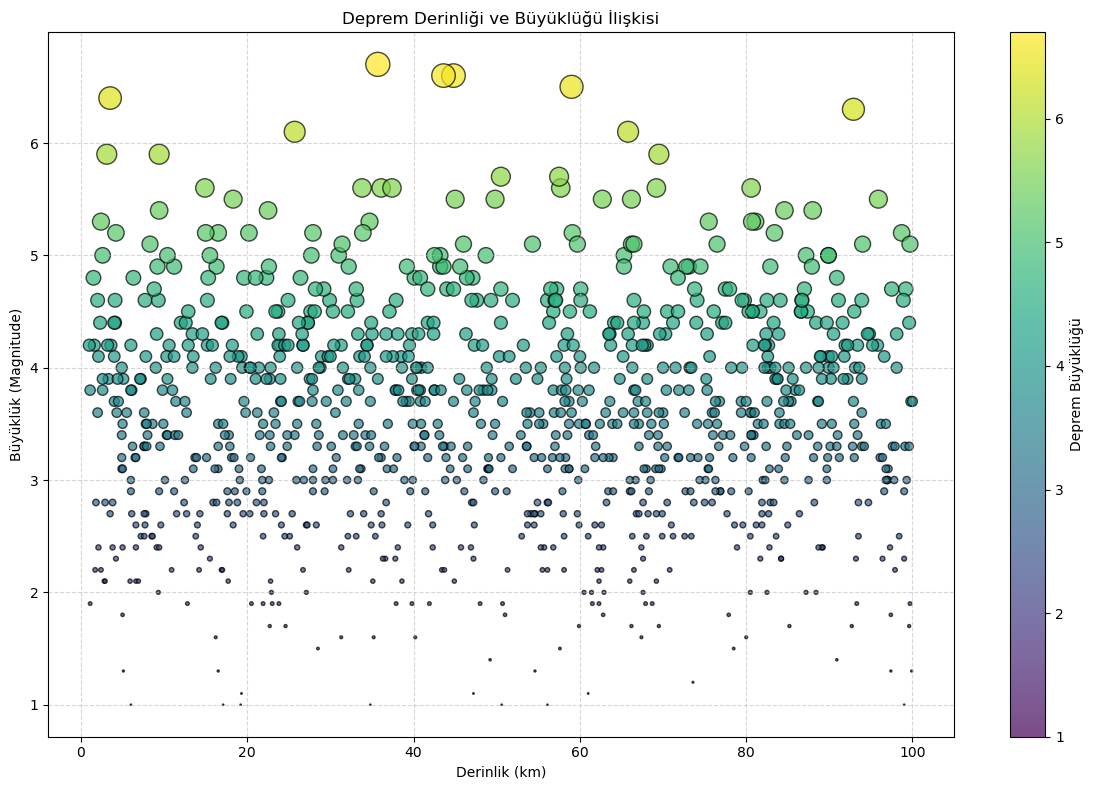

In [17]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df["depth"], df["mag"], 
    c=df["mag"], cmap="viridis", 
    s=df["mag"]**3, alpha=0.7, edgecolors="k"
)
plt.colorbar(scatter, label="Deprem Büyüklüğü")
plt.title("Deprem Derinliği ve Büyüklüğü İlişkisi")
plt.xlabel("Derinlik (km)")
plt.ylabel("Büyüklük (Magnitude)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()